# Travaller avec histogrammes

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


from IPython.display import Markdown
plt.style.use('bmh')
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'legend.fontsize': 20})



We are going to generate a random sample of data using ```numpy.random.gauss```

In [3]:
data1 = np.random.normal(loc=5,scale=1, size=1000) # 1st gaussian
data2 = np.random.normal(loc=10,scale=2, size=3000) # 2nd gaussian
data = np.concatenate((data1,data2))

ntotal = data.size
print (data[:10])

[4.75071033 4.60385033 5.2979428  5.75223365 4.79850525 5.25474592
 3.59234294 3.27774747 6.02911399 5.60770578]


Now we are going to make the representation of the data in a histogram

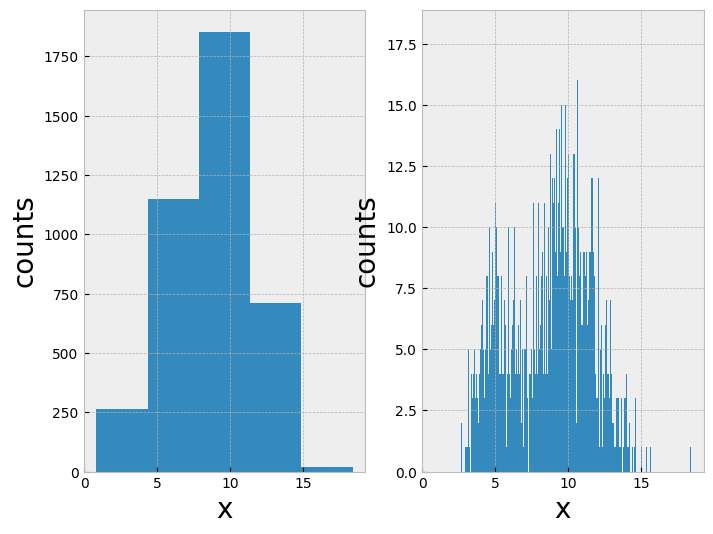

In [4]:
fig, axes = plt.subplots(1,2, figsize=(8, 6))
axes[0].hist(data, bins = 5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

axes[1].hist(data, bins = 1000)
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

plt.show()

Which one of the 2 binning is correct?

### Error of a bin

Each bin of a histogram has associated an error. This error can be derived from the binomial distribution. Indeed, we can see the process of an event falling into a bin (or not) as a binomial event. The probability of having $k$ success, or k events falling in a bin should therefore follow the binomial distribution:

$$P(k; n, p) = {n \choose k} p^k(1-p)^{n-k}$$

where $n$ are the total number of events in the sample and $p$ is the probability to fall into a given bin. This probability is unknown, but I could estimate from the histogram itself. For a given bin $i$, if I have $n_i$ events inside a bin $i$ then I can approximate the probability of falling into that bin as the ratio of events inside this bin, and the total number of events:

$$p \simeq \frac{n_i}{n}$$

In this case the mean of the binomial distribution for that particular bin $i$ can be written as:



$$\mu_i = n \cdot p $$ $$\equiv n_i$$ 


In other words, the mean of the binomial distribution of each bin, is the bin content $n_i$. I can do the same for the variance:

$$\sigma_i = \sqrt{np(1-p)} = \sqrt{n\frac{n_i}{n}(1 -\frac{n_i}{n})} = \sqrt{n_i}$$

Et voilá, I arrived at the conclusion that distribution of events inside a bin, should follow a binomial distribution with mean equal to the number of events inside a bin, and a dispersion of squared root of that number!

With this knowledge is now clear that from the plots above the one with 5 bins the fine structure of the data distribution is lost (too small relative errors), while with 1000 bins, heights of individual bins change more than the size of the bin errors (sampling error).



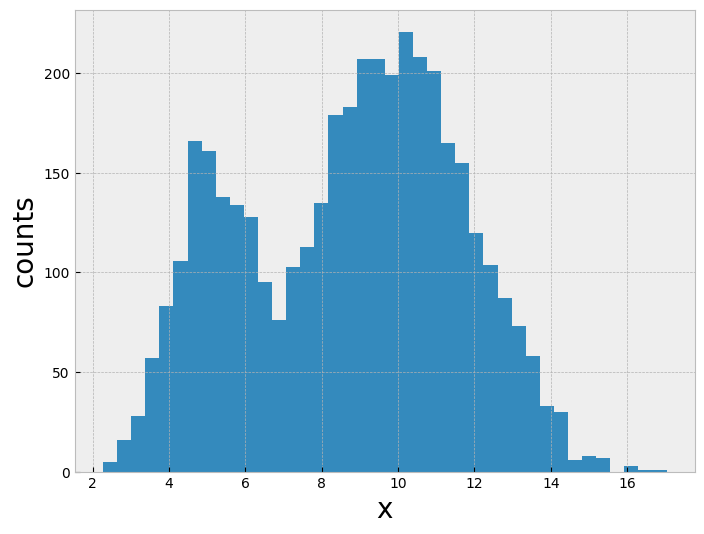

In [6]:

fig, ax = plt.subplots(1,1,figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = 40)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()



I can in principle also use different binning for different regions of a histrogram.

In [7]:
np.concatenate((np.linspace(0, 5, 50, endpoint=False), np.linspace(5,18, 10)))

array([ 0.        ,  0.1       ,  0.2       ,  0.3       ,  0.4       ,
        0.5       ,  0.6       ,  0.7       ,  0.8       ,  0.9       ,
        1.        ,  1.1       ,  1.2       ,  1.3       ,  1.4       ,
        1.5       ,  1.6       ,  1.7       ,  1.8       ,  1.9       ,
        2.        ,  2.1       ,  2.2       ,  2.3       ,  2.4       ,
        2.5       ,  2.6       ,  2.7       ,  2.8       ,  2.9       ,
        3.        ,  3.1       ,  3.2       ,  3.3       ,  3.4       ,
        3.5       ,  3.6       ,  3.7       ,  3.8       ,  3.9       ,
        4.        ,  4.1       ,  4.2       ,  4.3       ,  4.4       ,
        4.5       ,  4.6       ,  4.7       ,  4.8       ,  4.9       ,
        5.        ,  6.44444444,  7.88888889,  9.33333333, 10.77777778,
       12.22222222, 13.66666667, 15.11111111, 16.55555556, 18.        ])

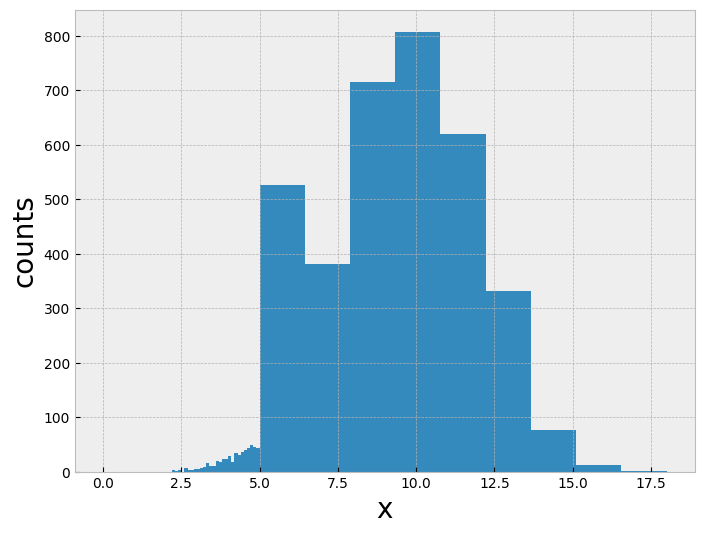

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=False),
                                     np.linspace(5,18, 10))), 
        density=False)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()

The method matplotlib.hist returns as well the bin_edges, the heights of the bins and an array of objects called patches, which represent the color, geometry, etc. of the bin representation.


### Normalization of histograms

As default histograms are representation of occourence ie, in their y-axis they show $n_i$ which is just the number of events inside that bin. However, histograms can also be used to represent a density distribution. In this case histograms need to be normalized. Normalizing a histogram means divinding each bin by the total number and the binwidth, ie:

$$ n_i \rightarrow \frac{n_i}{\Delta x N} $$

since

$$\lim_{N\rightarrow \infty, \Delta x \rightarrow 0} \frac{n_i}{N \Delta x} \equiv f(x)$$

and therefore the normalization  goes as:

$$\int_{-\infty}^{\infty} f(x) {\rm d} x = 1 \rightarrow \sum_i^{n_{bins}} \frac{n_i}{N \Delta x} \Delta x = 1$$

The ```ax.hist``` method can already do the normalized histogram. It is called ```density``` and it divides each bin by the total number and the bin_width:

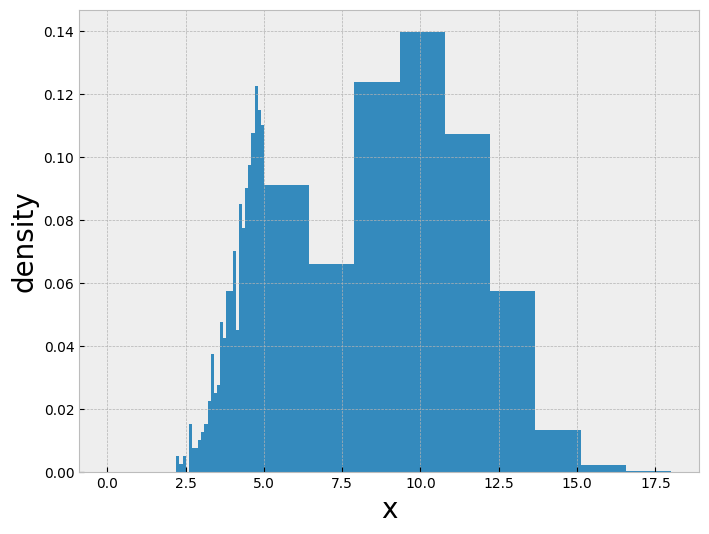

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50, endpoint=False),
                                     np.linspace(5,18, 10))), 
        density=True)
ax.set_xlabel("x")
ax.set_ylabel("density")
plt.show()

### Working without plotting

So far we used ``matplotlib.hist`` to create the historgrams. Sometimes you only need to access the information of the histograms without plotting them. In that case we can use ``numpy.histogram`` method which returns the same information as ``matplotlib.hist`` but without the patches:


In [10]:
hist, bin_edges = np.histogram(data, bins= 40, density=False)

print (hist)
print (bin_edges)

[  5  16  28  57  83 106 166 161 138 134 128  95  76 103 113 135 179 183
 207 207 199 221 208 201 165 155 120 104  87  73  58  33  30   6   8   7
   0   3   1   1]
[ 2.2674355   2.63664095  3.00584639  3.37505183  3.74425727  4.11346272
  4.48266816  4.8518736   5.22107904  5.59028449  5.95948993  6.32869537
  6.69790081  7.06710626  7.4363117   7.80551714  8.17472259  8.54392803
  8.91313347  9.28233891  9.65154436 10.0207498  10.38995524 10.75916068
 11.12836613 11.49757157 11.86677701 12.23598246 12.6051879  12.97439334
 13.34359878 13.71280423 14.08200967 14.45121511 14.82042055 15.189626
 15.55883144 15.92803688 16.29724233 16.66644777 17.03565321]


In [11]:
print (hist.size)
print (bin_edges.size)

40
41


Note that the bin_edges have an element more than the bin heights since it gives the overflow bin_edge. Also note that numpy returns the bin_edges and not the bin centers nor the bin widths. I can calulate those easily:


In [12]:
binwidths = np.diff(bin_edges)

print (binwidths)
print (binwidths.size)

[0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544 0.36920544
 0.36920544 0.36920544 0.36920544 0.36920544]
40


In [13]:
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.
print (bin_centers)
print (bin_centers.size)

[ 2.45203822  2.82124367  3.19044911  3.55965455  3.92885999  4.29806544
  4.66727088  5.03647632  5.40568177  5.77488721  6.14409265  6.51329809
  6.88250354  7.25170898  7.62091442  7.99011986  8.35932531  8.72853075
  9.09773619  9.46694164  9.83614708 10.20535252 10.57455796 10.94376341
 11.31296885 11.68217429 12.05137973 12.42058518 12.78979062 13.15899606
 13.52820151 13.89740695 14.26661239 14.63581783 15.00502328 15.37422872
 15.74343416 16.1126396  16.48184505 16.85105049]
40


In [14]:
hist, bin_edges = np.histogram(data, bins= 40, density = True)

print (np.sum(hist))


2.7085191178343013


Note that the sum is not 1. You need to multiply by the bin width to make:

$$\sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1 $$

In [15]:
bin_width = np.diff(bin_edges)[0]

print (np.sum(hist)*bin_width)

0.9999999999999994


Now I have all these series of heights and edges, how can I plot this without going back to ```plt.hist```?

Text(0, 0.5, 'density')

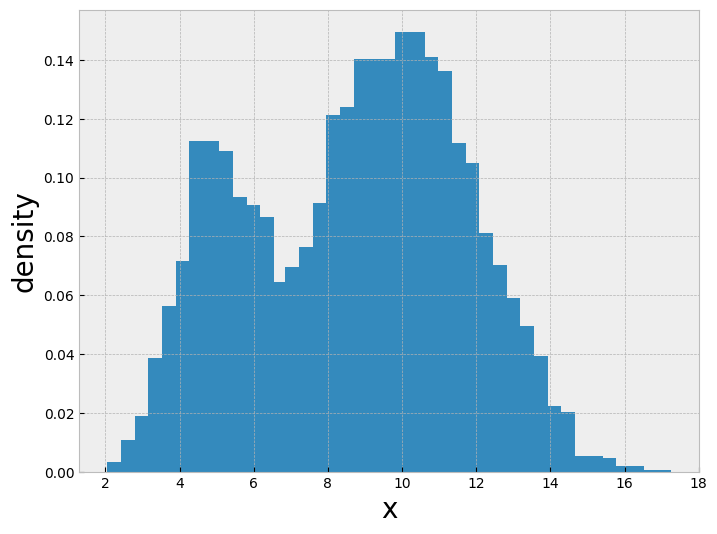

In [16]:
#hist, bin_edges = np.histogram(data, bins= 40, density = False)


bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.bar(bin_centers, hist)
ax.set_xlabel("x")
ax.set_ylabel("density")

(0.0, 0.175)

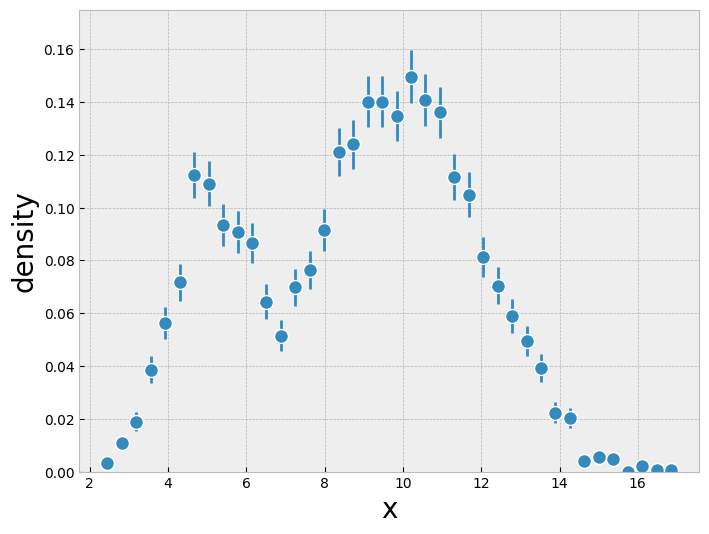

In [21]:
bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(bin_centers, hist, np.sqrt(hist/len(data)/bin_width), fmt='o', ms=10, markeredgecolor='white')
ax.set_xlabel("x")
ax.set_ylabel("density")
ax.set_ylim(0, 0.175)

In [1]:
from scipy import stats

In [3]:
p = stats.poisson(2)

In [15]:
p.sf(4)

0.052653017343711125